In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

### Loading the IMDB dataset

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [4]:
train_data[0]
len(train_data)

train_labels[0]
len(train_labels)

25000

In [5]:
max([max(sq) for sq in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
rev_word_indeces = dict([(value, key) for (value, key) in word_index.items()])
rev_word_indeces
# dict([(key, value) for (value, key) in word_index.items()])

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
decoded_review = ' '.join([rev_word_indeces.get(i - 3, '_') for i in train_data[0]])
decoded_review


'_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _'

In [8]:
import pandas as pd
imdb_df = pd.DataFrame(train_data, train_labels)

imdb_df

,0
1,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ..."
0,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,..."
0,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5..."
1,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,..."
0,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1..."
...,...
1,"[1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ..."
0,"[1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,..."
0,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,..."
1,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,..."


In [9]:

# finding the lens of each list of words
lengths = []
for i in range(len(train_data)):
    lengths.append(len(train_data[i]))
# print(lengths)
np.max(lengths)


2494

In [63]:
# max([len(train_data[0:])])    len of samples in dataset
# train_data[0]
# np.argmax(train_data[0:])


In [64]:
# n = np.array([4, 1, 4, 6, 4, 2, 6, 3, 8, 9])
# results = np.zeros((10, 10))
# results[1 , n] = 1
# results

### Encoding the integer sequences into a binary matrix

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


train_x = vectorize_sequences(train_data)
train_x
test_x = vectorize_sequences(test_data)
test_x

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [13]:
# print(0, train_data[0])

#### vectorize labels

In [14]:
train_y = np.asarray(train_labels).astype('float32')
test_y = np.asarray(test_labels).astype('float32')

In [66]:
# train_y

In [65]:
# test_y

### The Model Definition

In [17]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Compiling the model

In [18]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


####                   Using custom losses and metrics

In [19]:
# from keras import losses
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

### Setting aside a validation set

In [21]:
x_val = train_x[:10000]
partial_x_train = train_x[10000:]
partial_x_train
x_val

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]])

In [22]:
y_val = train_y[:10000]
partial_y_train = train_y[10000:]
partial_y_train

array([0., 0., 0., ..., 0., 1., 0.], dtype=float32)

### Training your model

In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 212us/step - loss: 0.5166 - acc: 0.7821 - val_loss: 0.3887 - val_acc: 0.8717
Epoch 2/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.3128 - acc: 0.8998 - val_loss: 0.3075 - val_acc: 0.8858
Epoch 3/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.2318 - acc: 0.9225 - val_loss: 0.2787 - val_acc: 0.8912
Epoch 4/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1790 - acc: 0.9436 - val_loss: 0.2718 - val_acc: 0.8909
Epoch 5/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1464 - acc: 0.9527 - val_loss: 0.2773 - val_acc: 0.8904
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1200 - acc: 0.9623 - val_loss: 0.3227 - val_acc: 0.8762
Epoch 7/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.0995 - acc: 0.9701 - val_loss: 0.3055 -

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

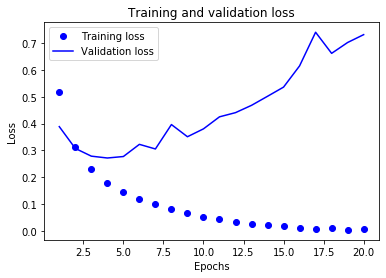

In [29]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
epochs_val = range(1, len(val_acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs_val, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

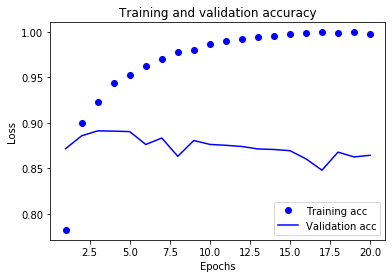

In [28]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Retraining a model from scratch With complete dataset

In [67]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=4, batch_size=512)
# results = model.evaluate(test_x, test_y)

history_dict1 = history.history
history_dict1.keys()

In [37]:
history_dict1 = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

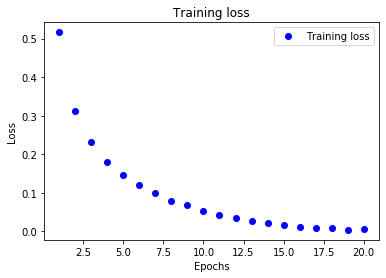

In [40]:
history_dict = history.history
loss_values = history_dict['loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

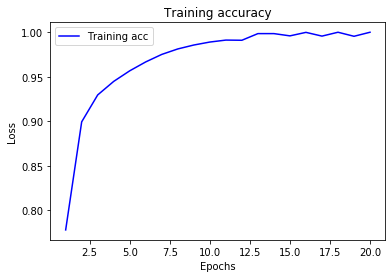

In [68]:
plt.clf()
acc_values = history_dict['acc']

plt.plot(epochs, acc, 'b', label='Training acc')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Using a trained network to generate predictions on new data

In [74]:
prediction = model.predict(test_x)
prediction

array([[0.00218612],
       [0.99999976],
       [0.9999974 ],
       ...,
       [0.19549754],
       [0.25926164],
       [0.9999982 ]], dtype=float32)

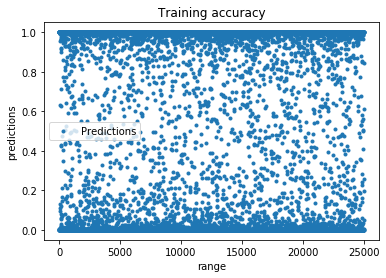

In [78]:
plt.clf()
predicted_values = prediction.flatten()

plt.plot(predicted_values, '.', label='Predictions')

plt.title('Training accuracy')
plt.xlabel('range')
plt.ylabel('predictions')
plt.legend()
plt.show()

In [79]:
# import pandas as pd
# pd.DataFrame(prediction).head(30)

## Further Experiments

In [80]:
# from keras import models
# from keras import layers
# model = models.Sequential()
# model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

In [81]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# history = model.fit(partial_x_train, partial_y_train,
#                     epochs=20,
#                     batch_size=512,
#                     validation_data=(x_val, y_val))

In [82]:
# history_dict2 = history.history
# history_dict2.keys()

In [83]:
# import matplotlib.pyplot as plt

# history_dict = history.history
# loss_values = history_dict['loss']
# acc = history_dict['acc']
# val_acc = history_dict['val_acc']
# val_loss_values = history_dict['val_loss']

# epochs = range(1, len(acc) + 1)
# epochs_val = range(1, len(val_acc) + 1)

# plt.plot(epochs, loss_values, 'bo', label='Training loss')
# plt.plot(epochs_val, val_loss_values, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [84]:
# plt.clf()
# acc_values = history_dict['acc']
# val_acc_values = history_dict['val_acc']
# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [85]:
# from keras import models
# from keras import layers
# model = models.Sequential()
# model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(86, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

In [86]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# history = model.fit(partial_x_train, partial_y_train,
#                     epochs=20,
#                     batch_size=512,
#                     validation_data=(x_val, y_val))

In [87]:
# from keras import models
# from keras import layers
# model = models.Sequential()
# model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(86, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

In [88]:
# model.compile(optimizer='rmsprop', loss='ms', metrics=['acc'])

# history = model.fit(partial_x_train, partial_y_train,
#                     epochs=20,
#                     batch_size=512,
#                     validation_data=(x_val, y_val))

In [89]:
# from keras import models
# from keras import layers
# model = models.Sequential()
# model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
# model.add(layers.Dense(64, activation='tanh'))
# model.add(layers.Dense(86, activation='tanh'))
# model.add(layers.Dense(1, activation='sigmoid'))

In [91]:
# model.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])

# history = model.fit(partial_x_train, partial_y_train,
#                     epochs=20,
#                     batch_size=512,
#                     validation_data=(x_val, y_val))